In [36]:
%load_ext autoreload
%autoreload 2

# Control figure size
figsize=(14, 4)

from util import util
import os
data_folder = os.path.join('..', 'data')
file_name = "Data"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Simple match rating

The task is to calculate the matchratings for matches between two teams. 

In [37]:
# Only run to update data file
# leagues = ["E0", "E1", "E2", "E3"]
leagues = ["E0"]
start_year, end_year = 2005, 2024
util.fetch_data_into_file(
    data_folder=data_folder,
    file_name=file_name,
    start_year=start_year,
    end_year=end_year,
    leagues=leagues,
)

Data fetched and saved to ../data/Data.csv


In [38]:
data = util.load_data(data_folder, file_name)
data

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,Season
0,E0,2005-08-13,Aston Villa,Bolton,2.0,2.0,D,2.0,2.0,D,...,6.0,14.0,16.0,7.0,8.0,0.0,2.0,0.0,0.0,0506
1,E0,2005-08-13,Everton,Man United,0.0,2.0,A,0.0,1.0,A,...,5.0,15.0,14.0,8.0,6.0,3.0,1.0,0.0,0.0,0506
2,E0,2005-08-13,Fulham,Birmingham,0.0,0.0,D,0.0,0.0,D,...,4.0,12.0,13.0,6.0,6.0,1.0,2.0,0.0,0.0,0506
3,E0,2005-08-13,Man City,West Brom,0.0,0.0,D,0.0,0.0,D,...,3.0,13.0,11.0,3.0,6.0,2.0,3.0,0.0,0.0,0506
4,E0,2005-08-13,Middlesbrough,Liverpool,0.0,0.0,D,0.0,0.0,D,...,7.0,17.0,11.0,5.0,0.0,2.0,3.0,1.0,0.0,0506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7216,E0,2024-05-19,Crystal Palace,Aston Villa,5.0,0.0,H,2.0,0.0,H,...,2.0,10.0,8.0,2.0,4.0,1.0,4.0,0.0,0.0,2324
7217,E0,2024-05-19,Liverpool,Wolves,2.0,0.0,H,2.0,0.0,H,...,3.0,14.0,11.0,10.0,2.0,1.0,1.0,0.0,1.0,2324
7218,E0,2024-05-19,Luton,Fulham,2.0,4.0,A,1.0,2.0,A,...,7.0,15.0,20.0,4.0,4.0,5.0,4.0,0.0,0.0,2324
7219,E0,2024-05-19,Man City,West Ham,3.0,1.0,H,2.0,1.0,H,...,2.0,3.0,12.0,11.0,2.0,0.0,1.0,0.0,0.0,2324


In [39]:
# cleaned data
clean_data = util.get_cleaned_data(data)
clean_data

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,Season
0,E0,2005-08-13,Aston Villa,Bolton,2.0,2.0,D,2.0,2.0,D,...,6.0,14.0,16.0,7.0,8.0,0.0,2.0,0.0,0.0,0506
1,E0,2005-08-13,Everton,Man United,0.0,2.0,A,0.0,1.0,A,...,5.0,15.0,14.0,8.0,6.0,3.0,1.0,0.0,0.0,0506
2,E0,2005-08-13,Fulham,Birmingham,0.0,0.0,D,0.0,0.0,D,...,4.0,12.0,13.0,6.0,6.0,1.0,2.0,0.0,0.0,0506
3,E0,2005-08-13,Man City,West Brom,0.0,0.0,D,0.0,0.0,D,...,3.0,13.0,11.0,3.0,6.0,2.0,3.0,0.0,0.0,0506
4,E0,2005-08-13,Middlesbrough,Liverpool,0.0,0.0,D,0.0,0.0,D,...,7.0,17.0,11.0,5.0,0.0,2.0,3.0,1.0,0.0,0506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7215,E0,2024-05-19,Crystal Palace,Aston Villa,5.0,0.0,H,2.0,0.0,H,...,2.0,10.0,8.0,2.0,4.0,1.0,4.0,0.0,0.0,2324
7216,E0,2024-05-19,Liverpool,Wolves,2.0,0.0,H,2.0,0.0,H,...,3.0,14.0,11.0,10.0,2.0,1.0,1.0,0.0,1.0,2324
7217,E0,2024-05-19,Luton,Fulham,2.0,4.0,A,1.0,2.0,A,...,7.0,15.0,20.0,4.0,4.0,5.0,4.0,0.0,0.0,2324
7218,E0,2024-05-19,Man City,West Ham,3.0,1.0,H,2.0,1.0,H,...,2.0,3.0,12.0,11.0,2.0,0.0,1.0,0.0,0.0,2324


380


### Generating the match rating
Now the match rating is calculated by the following formula:
 * sum up the goal difference of the last 6 matches for each team and do the following:
  * Home_team_goal_difference - Away_team_goal_difference = match_rating

This is done for every season and every leauge in the dataset. This i done to ensure that the matchrating only is based on the last 6 matched of the respective season and leauge. Some matches in each season and leauge will be skipped since to calculate the matchrating a team must have played at least 6 matches in the season and leauge.


In [55]:
data_matchrating = util.generate_matchrating_for_each_season_and_league(clean_data)
data_matchrating

Processing season: 0506
Skipped 52 matches due to insufficient previous matches.
Processing season: 0607
Skipped 51 matches due to insufficient previous matches.
Processing season: 0708
Skipped 53 matches due to insufficient previous matches.
Processing season: 0809
Skipped 51 matches due to insufficient previous matches.
Processing season: 0910
Skipped 53 matches due to insufficient previous matches.
Processing season: 1011
Skipped 50 matches due to insufficient previous matches.
Processing season: 1112
Skipped 51 matches due to insufficient previous matches.
Processing season: 1213
Skipped 51 matches due to insufficient previous matches.
Processing season: 1314
Skipped 50 matches due to insufficient previous matches.
Processing season: 1415
Skipped 50 matches due to insufficient previous matches.
Processing season: 1516
Skipped 50 matches due to insufficient previous matches.
Processing season: 1617
Skipped 50 matches due to insufficient previous matches.
Processing season: 1718
Skip

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HR,AR,Season,Home Goals Last 5,Away Goals Last 5,Home Conceded Last 5,Away Conceded Last 5,Home Goal Difference Last 5,Away Goal Difference Last 5,Matchrating
0,E0,2005-08-13,Aston Villa,Bolton,2.0,2.0,D,2.0,2.0,D,...,0.0,0.0,0506,None,None,None,None,None,None,None
1,E0,2005-08-13,Everton,Man United,0.0,2.0,A,0.0,1.0,A,...,0.0,0.0,0506,None,None,None,None,None,None,None
2,E0,2005-08-13,Fulham,Birmingham,0.0,0.0,D,0.0,0.0,D,...,0.0,0.0,0506,None,None,None,None,None,None,None
3,E0,2005-08-13,Man City,West Brom,0.0,0.0,D,0.0,0.0,D,...,0.0,0.0,0506,None,None,None,None,None,None,None
4,E0,2005-08-13,Middlesbrough,Liverpool,0.0,0.0,D,0.0,0.0,D,...,1.0,0.0,0506,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7215,E0,2024-05-19,Crystal Palace,Aston Villa,5.0,0.0,H,2.0,0.0,H,...,0.0,0.0,2324,16.0,13.0,4.0,10.0,12.0,3.0,9.0
7216,E0,2024-05-19,Liverpool,Wolves,2.0,0.0,H,2.0,0.0,H,...,0.0,1.0,2324,12.0,6.0,11.0,14.0,1.0,-8.0,9.0
7217,E0,2024-05-19,Luton,Fulham,2.0,4.0,A,1.0,2.0,A,...,0.0,0.0,2324,7.0,4.0,17.0,9.0,-10.0,-5.0,-5.0
7218,E0,2024-05-19,Man City,West Ham,3.0,1.0,H,2.0,1.0,H,...,0.0,0.0,2324,22.0,9.0,2.0,16.0,20.0,-7.0,27.0


In [59]:
nan_counts = data_matchrating["Matchrating"].isna().sum()
print(f"Number of NaN values in Matchrating: {nan_counts}")

Number of NaN values in Matchrating: 965


Now we can have a look at the different matchratings in the dataset.

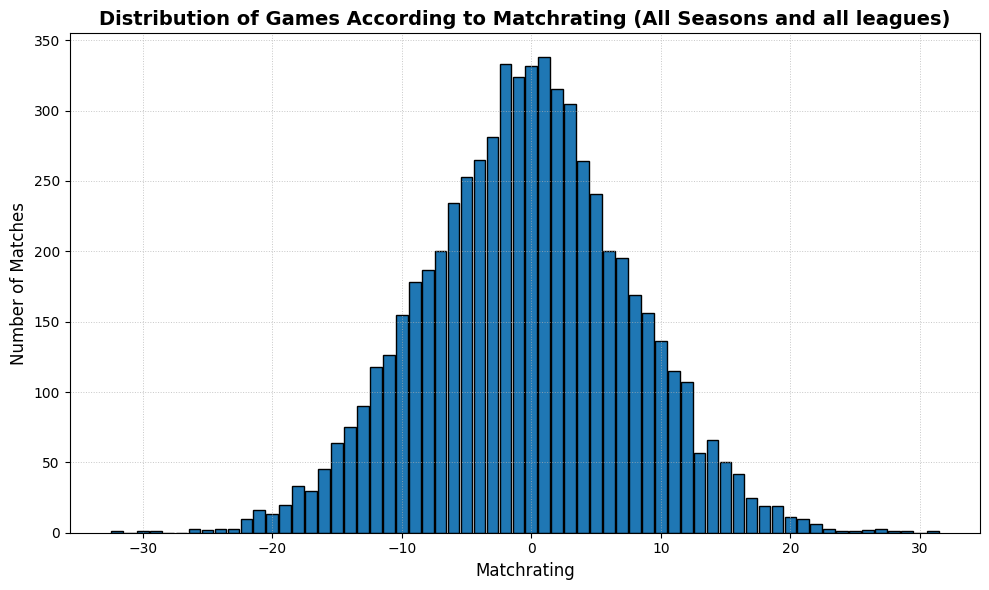

In [56]:
# Plot the histogram for all seasons combined
data_matchrating = data_matchrating.copy()
data_with_matchrating_for_every_match = data_matchrating["Matchrating"].dropna()

util.plot_histogram(
    data_with_matchrating_for_every_match,
    figsize=(10, 6),
    title="Distribution of Games According to Matchrating (All Seasons and all leagues)",
    xlabel="Matchrating",
    ylabel="Number of Matches",
)

Further we can have a look at the percentage of home wins, draws and away wins for the different matchratings.

In [60]:
outcome_percentages = util.calculate_outcome_percentages(data_matchrating)

# Display the resulting DataFrame
outcome_percentages

Outcome,Home Wins %,Draw %,Away Wins %,Number of Away Wins,Number of Draws,Number of Home Wins
Matchrating,,,,,,
-32.0,0.000000,0.000000,100.000000,1,0,0
-30.0,0.000000,0.000000,100.000000,1,0,0
-29.0,100.000000,0.000000,0.000000,0,0,1
-26.0,0.000000,0.000000,100.000000,3,0,0
-25.0,0.000000,0.000000,100.000000,2,0,0
-24.0,0.000000,0.000000,100.000000,3,0,0
-23.0,0.000000,66.666667,33.333333,1,2,0
-22.0,10.000000,10.000000,80.000000,8,1,1
-21.0,18.750000,25.000000,56.250000,9,4,3


As one can see in the data above 44.5 % of the matches with a matchrating of o ended in a home wins. This gives interesting information about the home advantage in football matches. 